In [2]:
#### 1 - Loading and cleaning dataset
## Import libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset “bigMart.csv”.
bigmart = pd.read_csv("bigMart.csv")

### Explore the dataset.
print(bigmart.shape)
print(bigmart.head())
print(bigmart.describe())

### Set grid style to white or dark
sns.set(style='whitegrid')

(8523, 12)
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium        

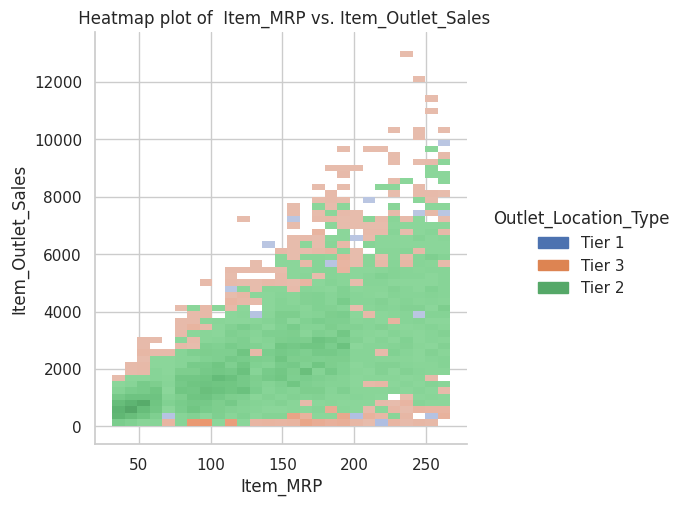

In [3]:
### 2 - Visualization Tasks:
### 2.1 - Displot (x, y): Create a distribution plot (displot) showing the distribution of Item_MRP (x)
####       and Item_Outlet_Sales (y). Parameters to explore: hue.
sns.displot(bigmart, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Location_Type')


plt.title(' Heatmap plot of  Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

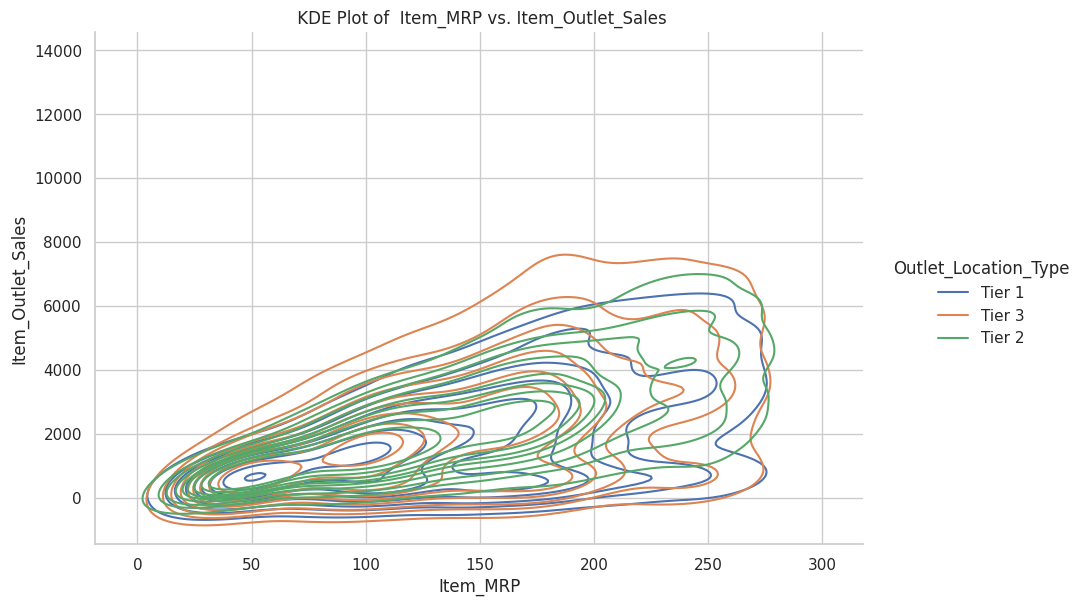

In [4]:
#### 2.2 - Displot(x, y) with  kind=kde: Create a distribution plot (displot) showing the distribution of Item_MRP (x) and
######       Item_Outlet_Sales (y) with kernel density estimation (KDE). Parameters to explore: hue,  kde.
sns.displot(bigmart, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Location_Type', kind='kde', height=6, aspect=1.5)

plt.title(' KDE Plot of  Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()


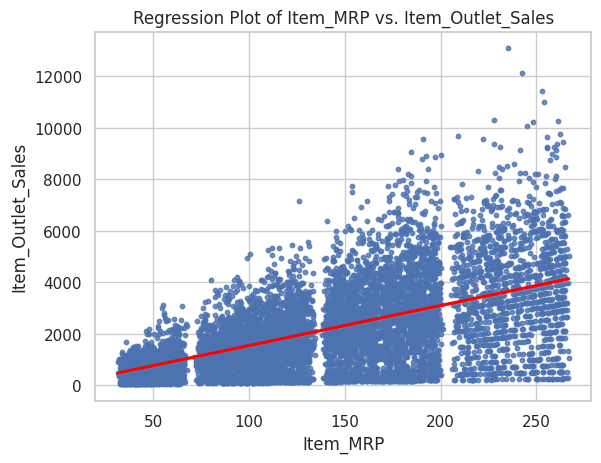

In [5]:
### 2.3 - Regplot(): Create a scatterplot with a regression line showing the relationship
#####     between Item_MRP and Item_Outlet_Sales. Parameters to explore: scatter_kws, line_kws,
sns.regplot(bigmart, x='Item_MRP', y='Item_Outlet_Sales', scatter_kws={'s': 10}, line_kws={'color': 'red'})

plt.title('Regression Plot of Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

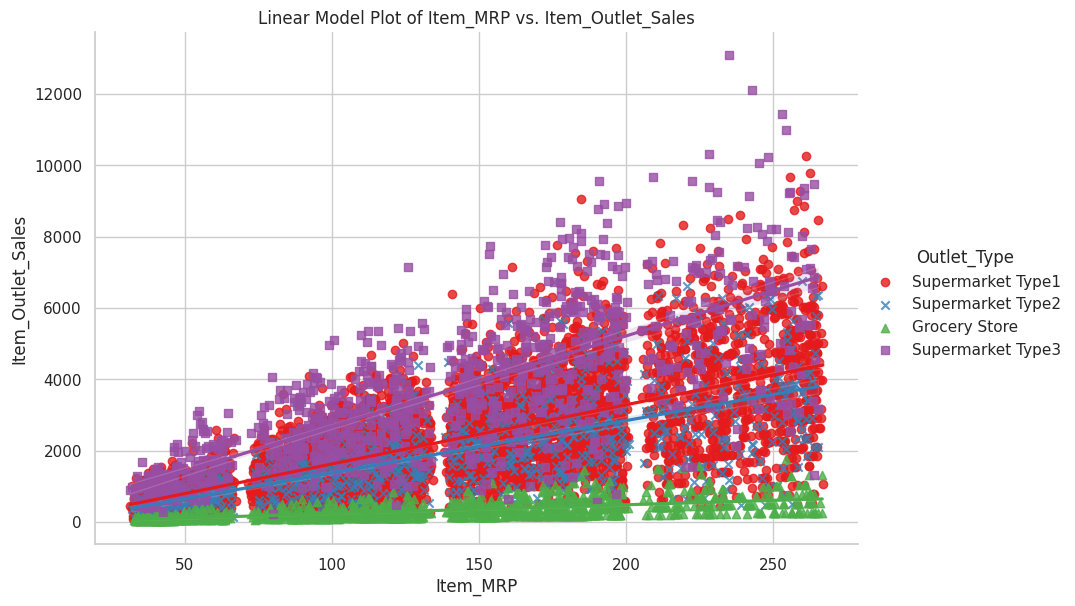

In [6]:
#### 2.4- Lmplot(): Create a scatterplot with a regression line showing the relationship between Item_MRP and Item_Outlet_Sales,
####     with different colors representing different Outlet_Type. Parameters to explore: hue, markers, palette.
#####    NOTE: Markers should be a set of 4 strings e.g. markers = ['o', 'x', '^', 's']
sns.lmplot(bigmart, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', markers=['o', 'x', '^', 's'], palette='Set1', height=6, aspect=1.5)

plt.title('Linear Model Plot of Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

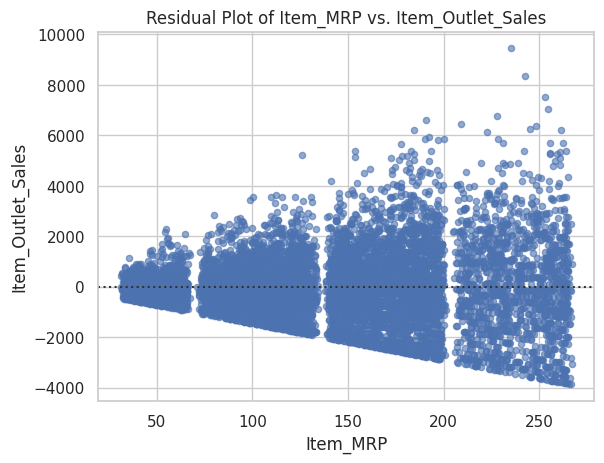

In [7]:
#### 2.5 - Residplot(): Create a residual plot showing the residuals of the regression between Item_MRP and Item_Outlet_Sales.
##### Parameters to explore: lowess, scatter_kws.

# Plotting a residplot
sns.residplot(bigmart, x='Item_MRP', y='Item_Outlet_Sales', scatter_kws={'s': 20, 'alpha': 0.6}, lowess=False)

plt.title('Residual Plot of Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

##### Create a pivot table to use for the heatmap and clustermap:
####        Item_Outlet_Sales for values
####        Item_Fat_Content for index
####        Outlet_Type for columns
####        Sum function for aggfunc

# Create a pivot table for the heatmap and clustermap
bigmart_pivot = bigmart.pivot_table(values='Item_Outlet_Sales', index='Item_Fat_Content', columns='Outlet_Type', aggfunc='sum', observed=True)


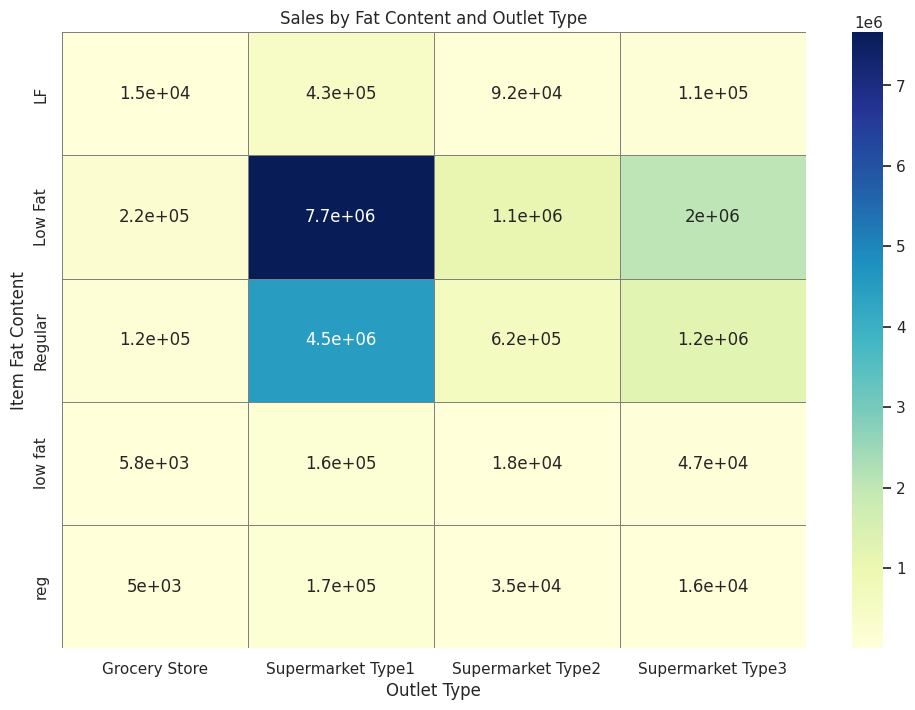

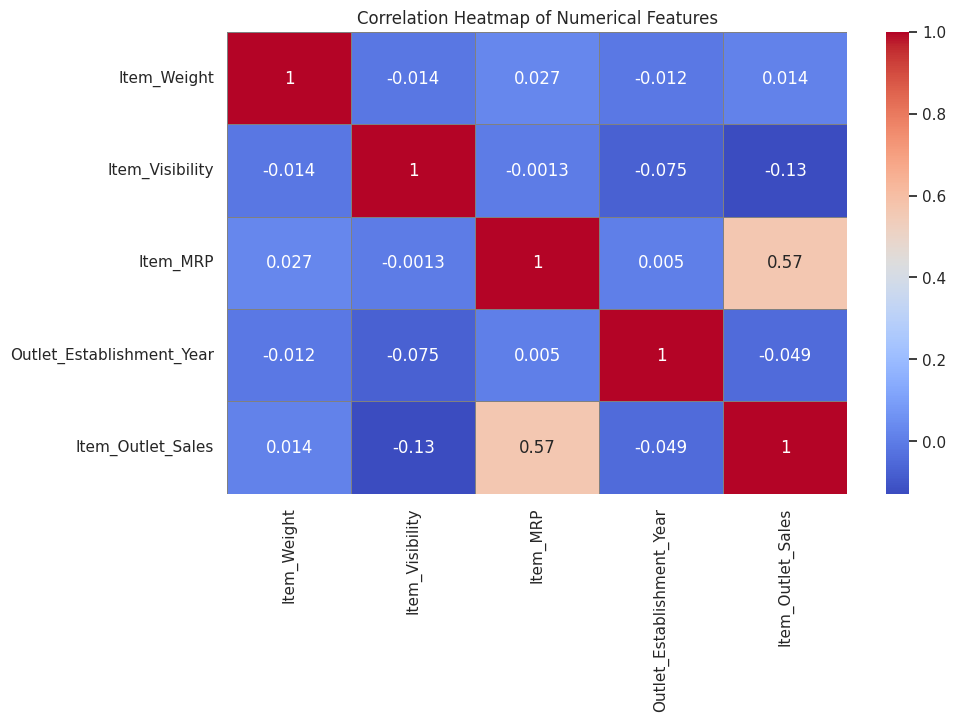

In [8]:
##### 2.6 - Heatmap(): Create a heatmap showing the correlation between different numerical variables in the dataset.
#####       Parameters to explore: annot, cmap.

### Using Pivot table define in question 5
plt.figure(figsize=(12, 8))
sns.heatmap(bigmart_pivot, annot=True, cmap="YlGnBu", linewidths=0.5, linecolor='gray')

plt.title('Sales by Fat Content and Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Fat Content')
plt.show()

# Compute correlation matrix of numerical variables
corr_matrix = bigmart.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

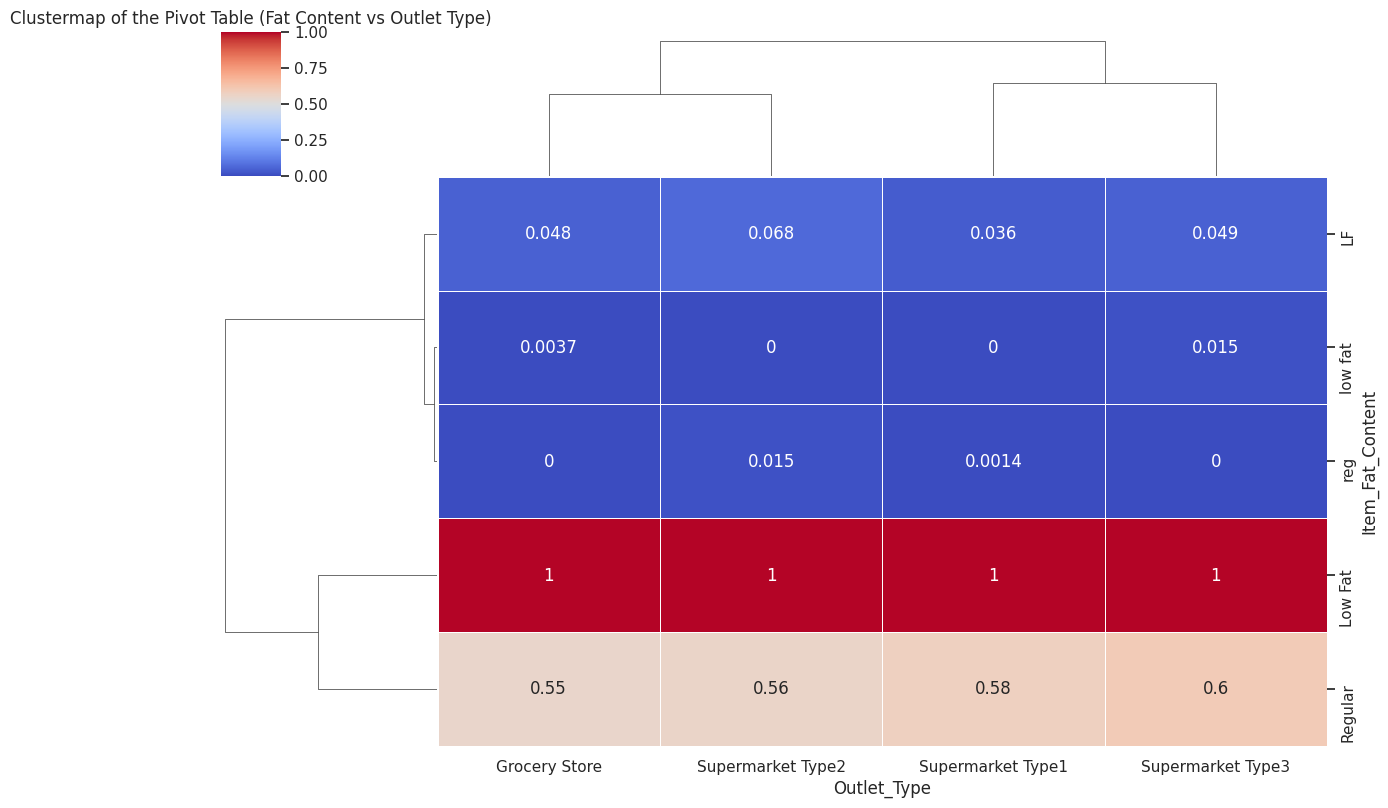

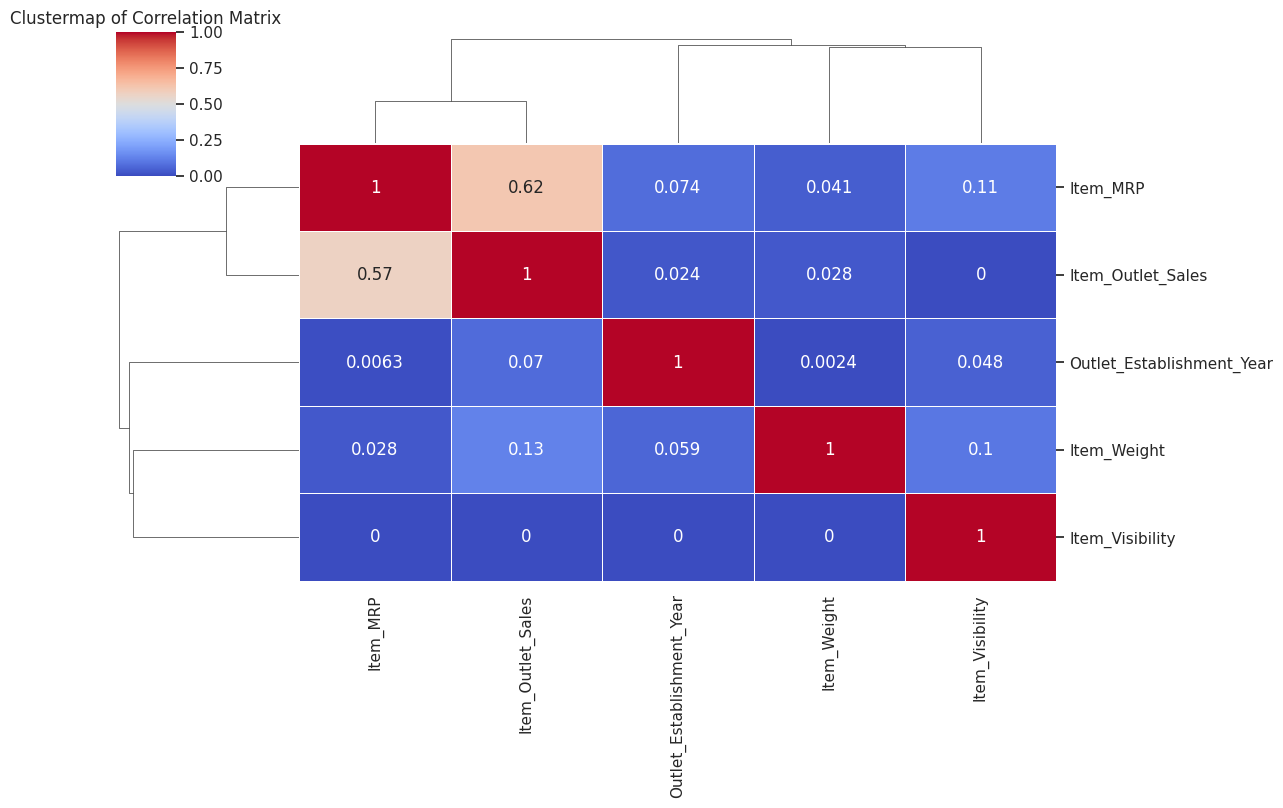

In [10]:
#### 2.7 - Clustermap(): Create a clustermap showing the hierarchical clustering of the correlation
####       between different numerical variables in the dataset. Parameters to explore: annot, cmap, figsize.

#### - Clustermap() using the pivot table : bigmart_pivot
sns.clustermap(data=bigmart_pivot, annot=True, cmap='coolwarm', linewidths=0.5, standard_scale=1, figsize=(12, 8))
plt.title('Clustermap of the Pivot Table (Fat Content vs Outlet Type)')
plt.show()

#### - Clustermap() of the correlation matrix
sns.clustermap(data=corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, standard_scale=1, figsize=(12, 8))

plt.title('Clustermap of Correlation Matrix')
plt.show()

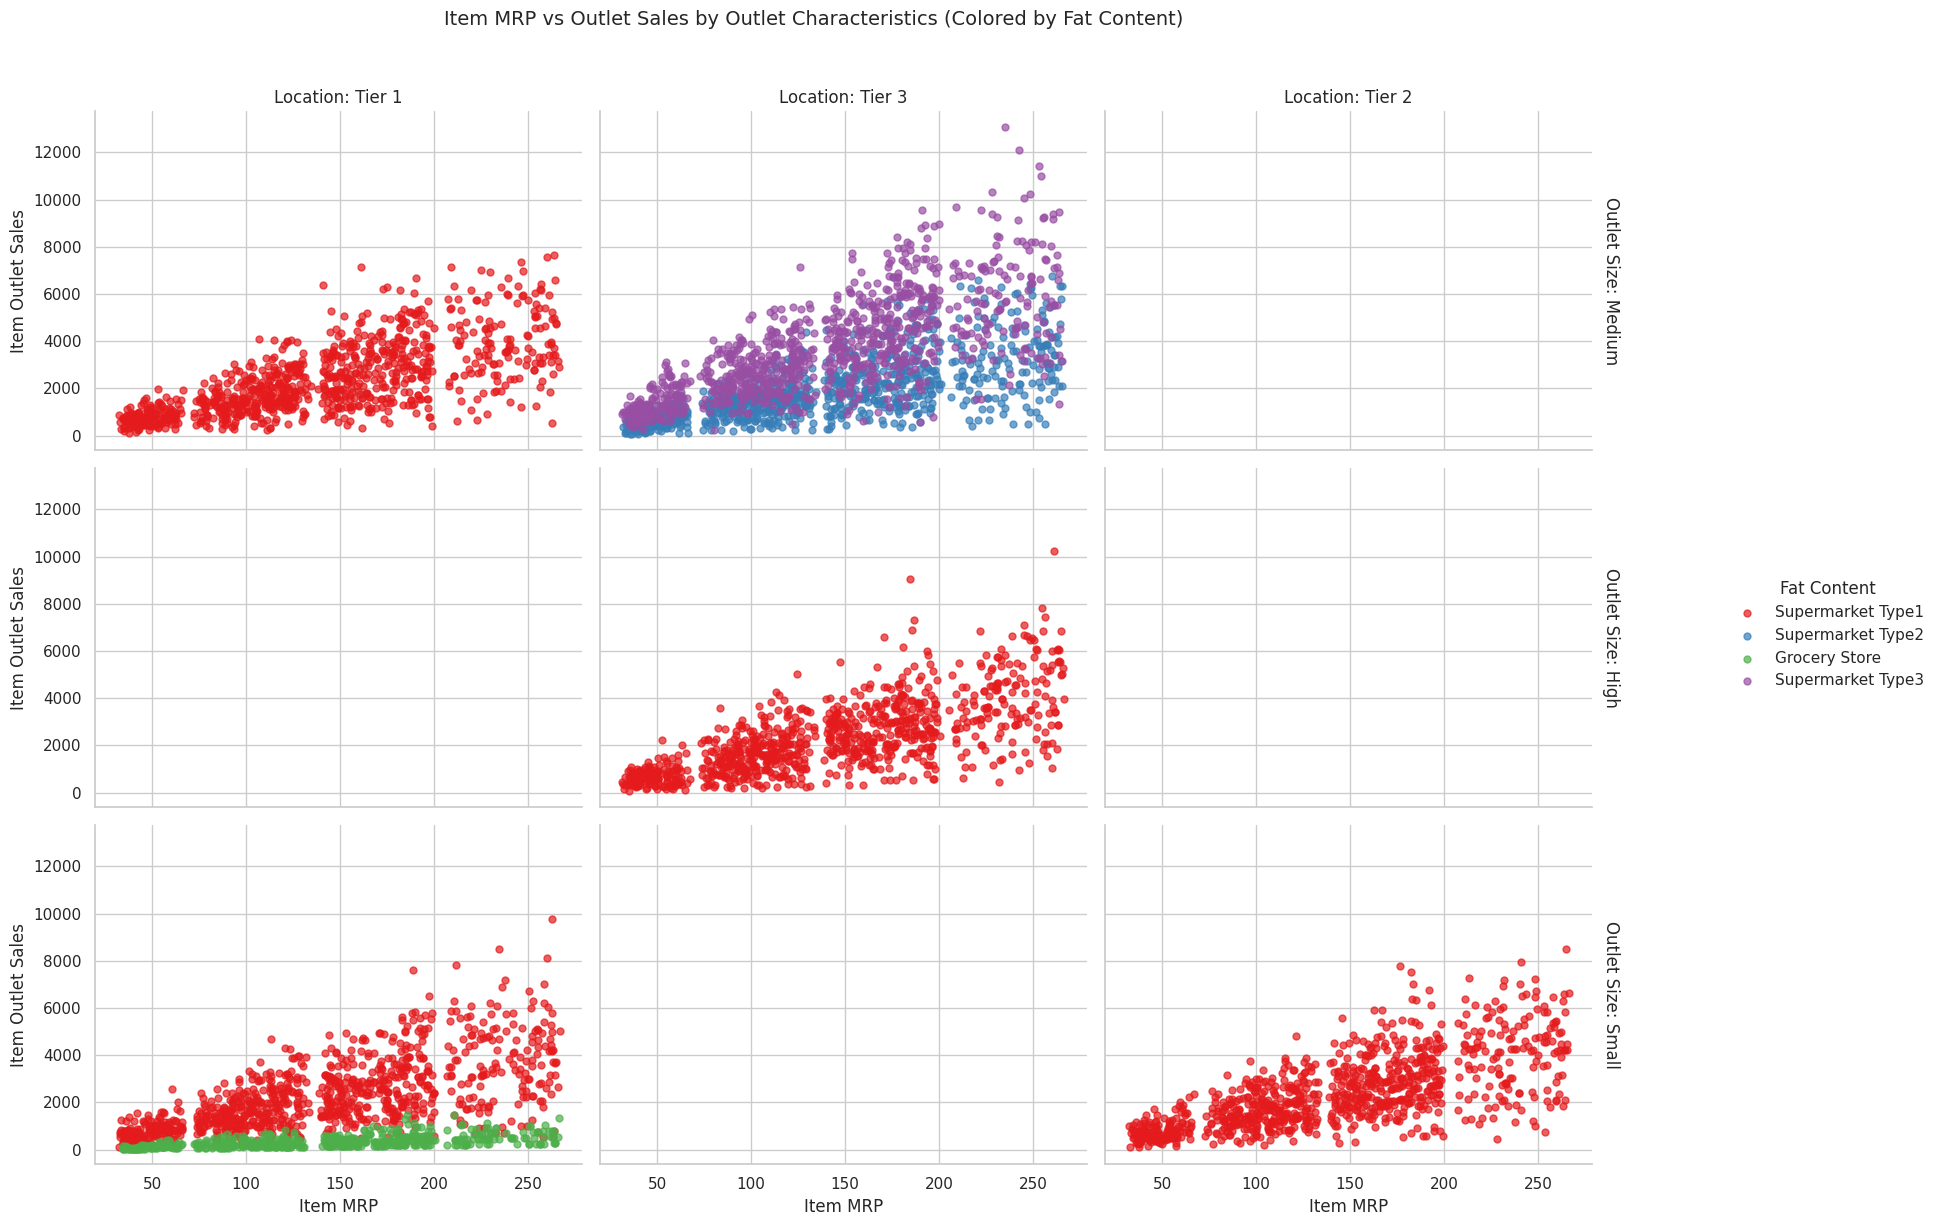

In [11]:
#### 2.8 - FacetGrid (using FacetGrid.map_dataframe): Create a FacetGrid with rows representing different Outlet_Size
####      and columns representing different Outlet_Location_Type, plotting the relationship between Item_MRP and Item_Outlet_Sales.
#####      Parameters to explore: col, hue, palette. Add legend and save the figure as an image.

g = sns.FacetGrid(bigmart, row='Outlet_Size', col='Outlet_Location_Type', hue='Outlet_Type', height=4, aspect=1.2, margin_titles=True, palette='Set1')

g.map_dataframe(plt.scatter, 'Item_MRP', 'Item_Outlet_Sales', alpha=0.7, s=25)
g.set_axis_labels('Item MRP', 'Item Outlet Sales')
g.set_titles(row_template='Outlet Size: {row_name}', col_template='Location: {col_name}')

# Add legend
g.add_legend(title='Fat Content', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Add overall title
g.fig.suptitle('Item MRP vs Outlet Sales by Outlet Characteristics (Colored by Fat Content)',  fontsize=14, y=1.02)

plt.tight_layout()
plt.savefig('facetgrid_with_hue.png', dpi=300, bbox_inches='tight')
plt.show()

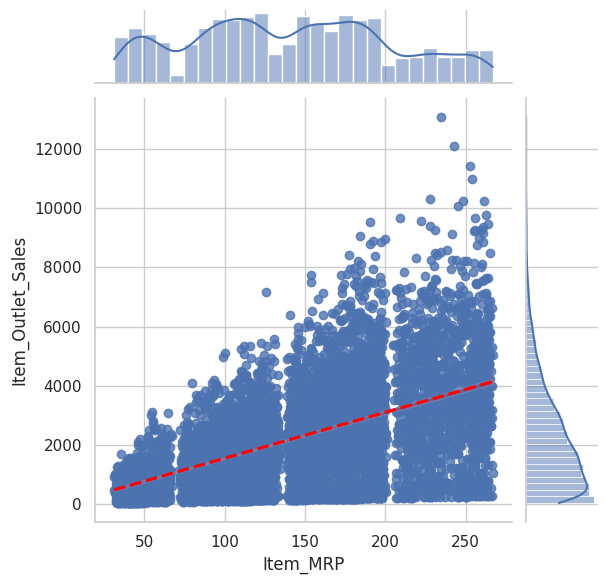

In [12]:
##### 2.9 - JointGrid (using JointGrid.plot_joint() and JointGrid.plot_marginals()): Create a JointGrid showing the joint
####        distribution of Item_MRP and Item_Outlet_Sales, with marginal distributions plotted along the axes.
####        Parameters to explore: kde=True for “scatterplot”. Save the figure as an image.

# Create JointGrid instance
grid = sns.JointGrid(bigmart, x='Item_MRP', y='Item_Outlet_Sales', height=6)

# Plot joint plot with regression line
grid.plot_joint(sns.regplot, line_kws={'linestyle': '--', 'color': 'red'})

# Plot marginal scatterplot
grid.plot_marginals(sns.histplot, kde=True) #sns.scatterplot, sns.kdeplot, fill=True

# Save the plot
grid.savefig('JointGrid.png', dpi=300, bbox_inches='tight')
#plt.savefig('jointgrid_2d_kde_hist.png', dpi=300, bbox_inches='tight')

plt.show()

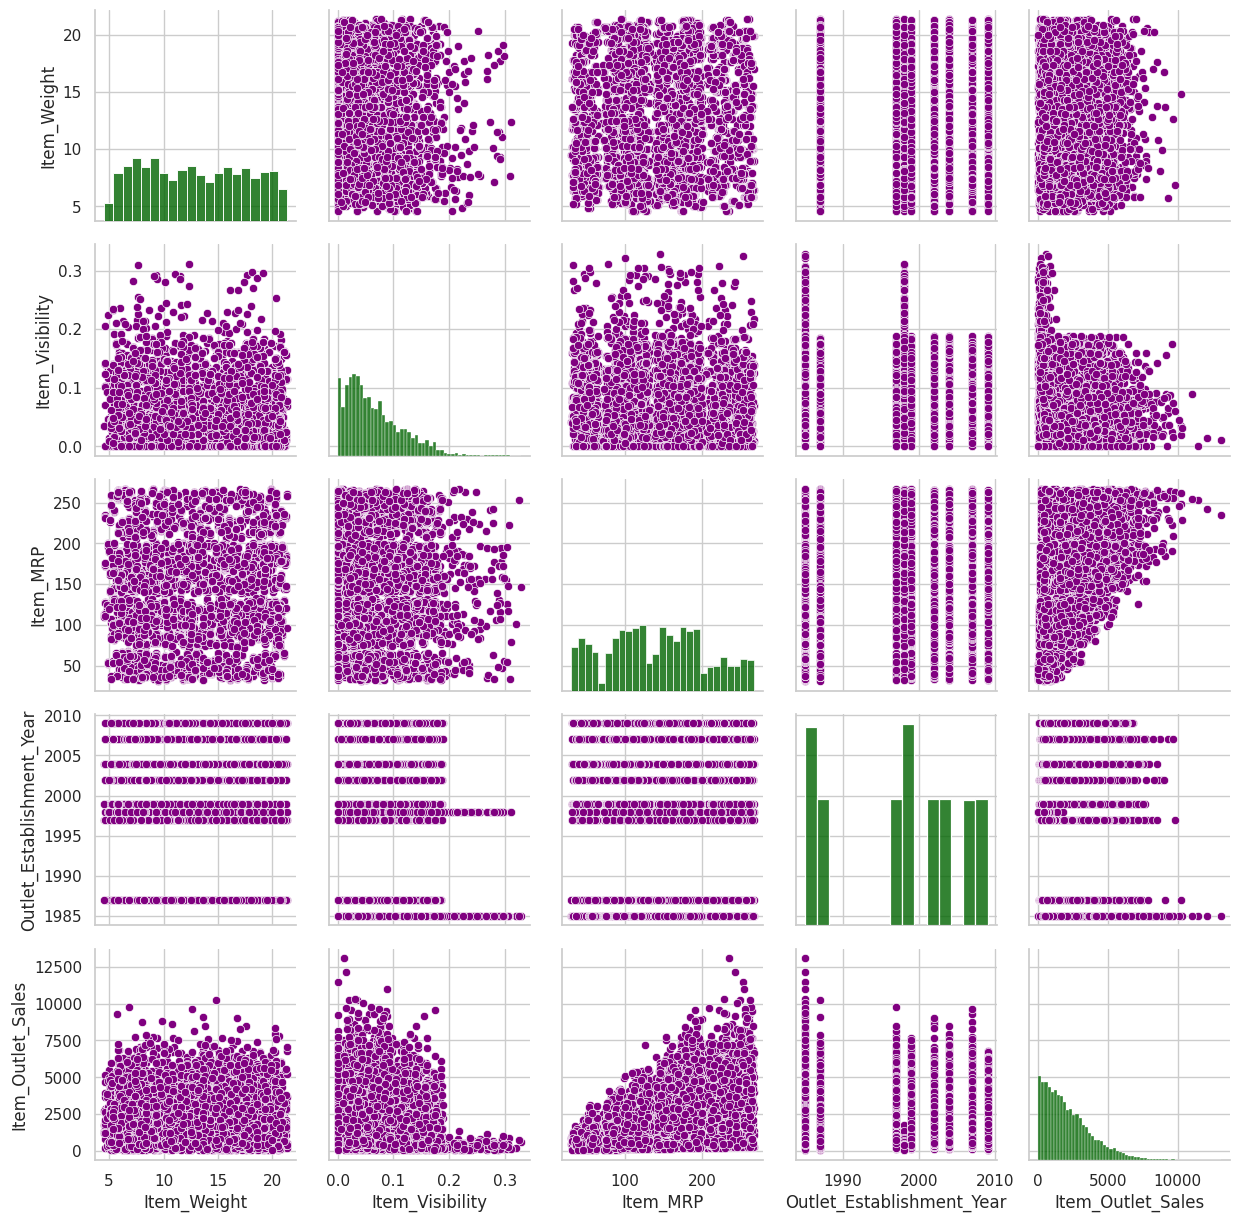

In [13]:
#### 2.10 - PairGrid (using PairGrid.map_diag() and PairGrid.map_offdiag()):
#####       Create a PairGrid showing histograms on the diagonal and scatterplots for the off-diagonal plots.
#####       Parameters to explore: color for both plots. Save the figure as an image.

# Create PairGrid instance
grid = sns.PairGrid(bigmart, height=2.5) #, vars=['age', 'charges', 'smoker']

# Plot pair plot with histograms in diagonals
grid.map_diag(sns.histplot, color='darkgreen', alpha=0.8)

# Map scatter plot with different marker shapes for smokers and non-smokers
grid.map_offdiag(sns.scatterplot, color='purple', markers='o')

# Save the plot
grid.savefig('PairGrid.png')

# Show the plot
plt.show()